In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 그래프 설정
plt.rcParams['font.family']= 'Malgun Gothic'
# plt.rcParams['font.family']= 'AppleGothic'
plt.rcParams['font.size']  = 16
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['axes.unicode_minus'] = False

In [12]:
LCK = pd.read_csv('projectData/LCK1.csv', encoding='cp949', index_col=0)

# 쇼메이커, 캐니언 겹치는 정보 드랍해주기
bbb = LCK[LCK['call_name'] == 'DK ShowMaker']
ccc = LCK[LCK['call_name'] == 'DK Canyon']
ddd =bbb[bbb['line'] == 'AD'].index
eee =ccc[ccc['line'] == 'MID'].index

LCK = LCK.drop(index=ddd)
LCK = LCK.drop(index=eee)

In [22]:
LCK

,call_name,player_name,line,champion,game,win_rate,kill,death,assist,kda,win,lose,dpm
0,KT Doran,최현준2000.07.22,TOP,리 신,7,42.9%,3.0,3.0,5.0,2.7,3,4,446
1,KT Doran,최현준2000.07.22,TOP,제이스,6,83.3%,3.7,2.3,5.8,4.1,5,1,628
2,KT Doran,최현준2000.07.22,TOP,비에고,5,40.0%,2.6,1.8,5.0,4.2,2,3,405
3,KT Doran,최현준2000.07.22,TOP,레넥톤,5,20.0%,2.0,3.2,3.8,1.8,1,4,401
4,KT Doran,최현준2000.07.22,TOP,그웬,5,40.0%,3.2,2.8,4.4,2.7,2,3,596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,DRX Becca,손민우2003.03.28,SUP,알리스타,1,0%,0.0,5.0,10.0,2.0,0,1,139
539,DRX Becca,손민우2003.03.28,SUP,유미,1,0%,0.0,2.0,2.0,1.0,0,1,219
540,DRX Becca,손민우2003.03.28,SUP,라칸,1,0%,0.0,3.0,7.0,2.3,0,1,160
541,DRX Becca,손민우2003.03.28,SUP,렐,1,0%,0.0,4.0,1.0,0.3,0,1,79


In [23]:
# 가장 많이 사용된 챔피언 

LCK.groupby('champion', as_index=False).sum().sort_values('game', ascending=False).head(10)

,champion,game,kill,death,assist,kda,win,lose,dpm
21,리 신,88,64.5,54.6,122.1,90.1,46,42,7392
26,바루스,79,28.3,26.2,50.4,37.8,38,41,6277
16,레오나,73,4.5,42.3,74.6,25.7,38,35,1165
30,비에고,62,44.3,40.6,76.4,56.8,29,33,5522
9,다이애나,61,38.5,25.5,68.2,44.8,34,27,4034
14,럼블,60,42.8,36.6,85.0,60.0,27,33,6047
39,세트,59,30.4,57.1,89.0,51.3,28,31,5556
3,그웬,55,38.8,34.8,50.8,37.0,21,34,5569
57,이즈리얼,52,41.1,24.0,47.9,77.1,27,25,7462
46,아펠리오스,48,39.8,26.5,43.6,59.9,22,26,5516


리신, 바루스, 레오나, 비에고, 다이애나 순으로 스왑가능, 혹은 라인전을 강하게 가져갈 수 있는 픽

In [20]:
# dpm이 높은 순으로 상위 10개 뽑아내봄
LCK.groupby('champion', as_index=False).mean().sort_values('dpm', ascending=False).nlargest(10,'dpm')

,champion,game,kill,death,assist,kda,win,lose,dpm
10,드레이븐,1.000000,10.000000,4.000000,7.000000,4.300000,1.000000,0.000000,675.000000
45,아트록스,1.000000,3.500000,2.000000,7.000000,8.150000,1.000000,0.000000,655.000000
62,제이스,3.125000,1.775000,3.200000,3.712500,2.862500,1.875000,1.250000,624.750000
76,키아나,1.000000,6.000000,1.000000,5.000000,11.000000,1.000000,0.000000,614.000000
1,갱플랭크,3.750000,1.850000,2.175000,4.475000,3.100000,1.750000,2.000000,606.500000
64,직스,1.666667,1.966667,3.133333,3.300000,2.250000,0.833333,0.833333,593.666667
57,이즈리얼,4.000000,3.161538,1.846154,3.684615,5.930769,2.076923,1.923077,574.000000
26,바루스,7.181818,2.572727,2.381818,4.581818,3.436364,3.454545,3.727273,570.636364
20,르블랑,4.000000,2.528571,1.514286,3.871429,5.671429,2.428571,1.571429,559.714286
70,카사딘,1.500000,5.000000,1.500000,6.250000,8.950000,1.000000,0.500000,552.500000


## 다른 데이터로도 확인

In [6]:
# 다른 데이터로 확인하기
LCK = pd.read_csv('projectData/LCK_RESULT.csv', index_col=0)
LCK['version'] = LCK['version'].str.replace('버전','')
LCK['version'] = LCK['version'].str.replace(' ','')
LCK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 0 to 1214
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_date          1215 non-null   object
 1   version            1215 non-null   object
 2   team1_name         1215 non-null   object
 3   team1_score        1215 non-null   int64 
 4   team2_score        1215 non-null   int64 
 5   team2_name         1215 non-null   object
 6   gametime           1215 non-null   object
 7   blue_team          1215 non-null   object
 8   blue_score         1215 non-null   int64 
 9   blue_ban           1215 non-null   object
 10  blue_object        1215 non-null   object
 11  blue_object_count  1215 non-null   int64 
 12  blue_call_name     1215 non-null   object
 13  blue_line          1215 non-null   object
 14  blue_champion      1215 non-null   object
 15  blue_kill          1215 non-null   int64 
 16  blue_death         1215 non-null   object


In [7]:
a =LCK['blue_champion'].value_counts().head(8)
b = LCK['red_champion'].value_counts().head(8)

In [8]:
sns.set_palette('Pastel2')

C:\Users\LUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


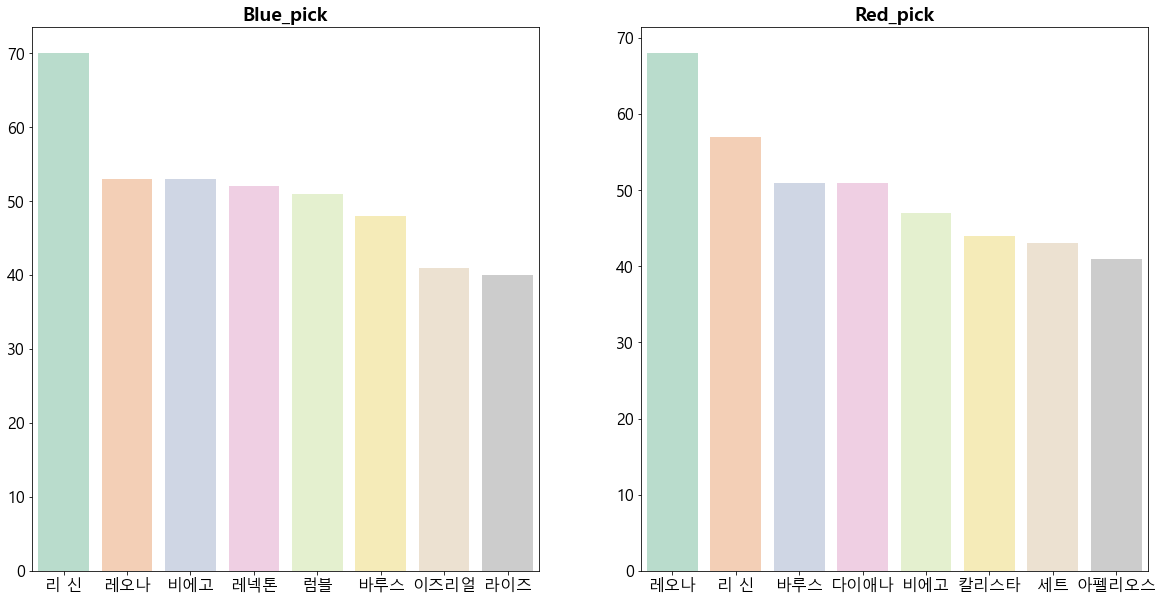

In [9]:
fig, ax1= plt.subplots(nrows=1, ncols=2, figsize=(20,10))


sns.barplot(a.index, a.values, ax=ax1[0])
ax1[0].set_title('Blue_pick', weight = 'bold')

sns.barplot(b.index, b.values, ax=ax1[1])
ax1[1].set_title('Red_pick', weight = 'bold')


plt.show()

In [10]:
# 픽 말고 밴이 가장 많이된 챔프를 확인해보자
ban_a  =LCK[['blue_ban']]
ban_a.columns=['ban']
ban_b  =LCK[['red_ban']]
ban_b.columns=['ban']
ban_all =pd.concat([ban_a,ban_b])

In [11]:
# 밴카드 상위 10개 확인
ban_all.value_counts().head(10)

ban 
루시안     152
레넥톤     142
칼리스타    109
제이스     100
신 짜오     97
바루스      92
리 신      85
나르       82
아칼리      82
직스       78
dtype: int64

 - 루시안, 레넥톤, 칼리, 제이스  라인전이 강한 픽들이 많이 밴되는거같음


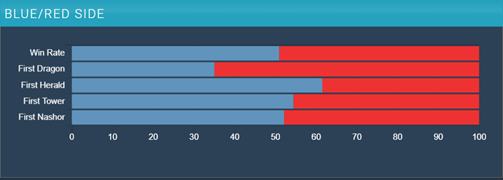

gol.gg 참고자료
블루팀이 전체적으로 우세한 것을 알 수 있음